In [1]:
from sympy import *
import mpmath
init_printing()

'''
r_GEO = 36000 + 6371 KM
r_LEO = 2000 + 6371 KM

G = 6.674e-11
Me = 5.972e24
'''

M, E = symbols("M E", Functions = True)
e_c, a, G, M_e, r, mu = symbols("e_c a G M_e r mu", Contstants = True)
T_circular, T_elliptical, T_GEO, T_GTO, T_LEO, r_LEO, r_GEO, T_tot = symbols("T_circular T_elliptical T_GEO T_GTO T_LEO r_LEO r_GEO T_tot", Constants = True)
t, x, y, Y = symbols("t x y Y", Variables = True)

mu_calculated = (6.674e-11 * 5.972e24)

The orbital period of a circular Orbit:

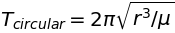

In [2]:
Eq(T_circular, 2*pi*sqrt(r**3 / mu))

Where mu is: 

In [3]:
Eq(mu, G*M_e)

Then, the GEO's orbital period in hours is:

In [4]:
r_GEO_Calculated = (36000 + 6371)*1000
T_GEO_Calculated = 2*pi*sqrt(r_GEO_Calculated**3 / mu_calculated)
Eq(T_GEO, T_GEO_Calculated.evalf()/60/60)

And the LEO's orbital period in hours is:

In [5]:
r_LEO_Calculated = (2000 + 6371)*1000
T_LEO_Calculated = 2*pi*sqrt(r_LEO_Calculated**3 / mu_calculated)
Eq(T_LEO, T_LEO_Calculated.evalf()/60/60)

_____________________________________________
# Finding the GTO.
The goal is to get both 'e' (the eccentricity of our GTO) and 'a' (its semi-major axis). So, we need 2 eqns.

The equation of the GEO (A circle equation):

In [6]:
geo = Eq(y**2, r**2-x**2)
geo

The equation of the GTO (An ellipse equation):

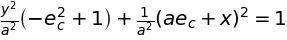

In [7]:
gto = Eq(((x+a*e_c)**2/a**2)+(y**2/a**2*(1-e_c**2)), 1)
gto

We Wanna solve these two eqns to get the semi-major axis of our GTO and the raduis of our LEO.

first, substitute the GEO's eqn in the GTO's eqn.

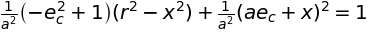

In [8]:
toSolve = gto.subs({y**2:geo.rhs})
toSolve

Now we can solve for x.

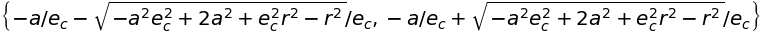

In [9]:
solX = solveset(toSolve, x)
solX

Now we can calculate the y coordinate for each x.

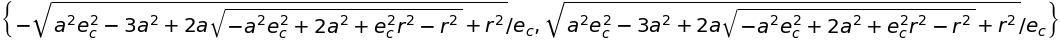

In [10]:
solY1 = solveset(Eq(geo.lhs, geo.rhs.subs({x:list(solX)[0]})), y)
solY1

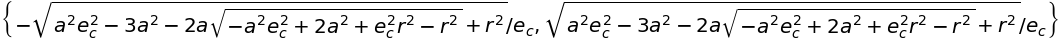

In [11]:
solY2 = solveset(Eq(geo.lhs, geo.rhs.subs({x:list(solX)[1]})), y)
solY2

We have 4 different possible points for the intersection between a circle and an ellipse, but the intersection between the GEO and the GTO is going to be at only one point with an x coordinate of '-r_GEO' (the radius of the GEO). 

Now, we can get the first eqn.

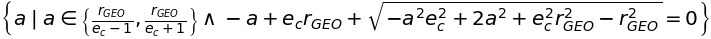

In [12]:
geoAndGtoIntersection = solveset(Eq(list(solX)[0], -r_GEO).subs({r:r_GEO}), a)
geoAndGtoIntersection

Surbrisingly, there are 2 possible values for a. But we're not interrested in the negative value. So our first eqn is:

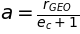

In [13]:
eqn1 = Eq(a, list(list(geoAndGtoIntersection.args)[2])[1])
eqn1

To get another eqn, we can do the same but this time with the LOE.

The intersection between our LEO and GTO is exactly at the x coordinate of 'r_LEO'.

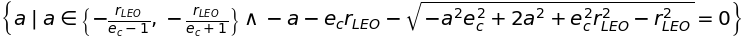

In [14]:
gtoAndLeoIntersection = solveset(Eq(list(solX)[1], r).subs({r:r_LEO}), a)
gtoAndLeoIntersection

Again, there are 2 possible values for 'r_LEO' but we need the positive one.

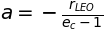

In [15]:
eqn2 = Eq(a, list(list(gtoAndLeoIntersection.args)[2])[0])
eqn2

This is the positive because 0 < e_c < 1.

Now, we have 2 eqns and 2 variables. And we're ready to get 'a' and 'e_c'

In [16]:
e_c_Exp = Eq(e_c, solveset(eqn1.subs({a:eqn2.rhs, r_GEO:r_GEO_Calculated, r_LEO:r_LEO_Calculated}), e_c).args[0])
e_c_Calculated = e_c_Exp.rhs
e_c_Exp

In [17]:
s = solveset(eqn2.subs({r_LEO:r_LEO_Calculated, e_c:e_c_Calculated})).args[0]
a_Exp = Eq(a, s)
a_Calculated = a_Exp.rhs
a_Exp

There's another way for finding 'a'.

In [18]:
p1 = plot(sqrt(r_GEO_Calculated**2-x**2), -sqrt(r_GEO_Calculated**2-x**2), sqrt(r_LEO_Calculated**2-x**2), -sqrt(r_LEO_Calculated**2-x**2), sqrt(a_Calculated**2*(1-e_c_Calculated**2)*(1-((x+a_Calculated*e_c_Calculated)**2/a_Calculated**2))), -sqrt(a_Calculated**2*(1-e_c_Calculated**2)*(1-((x+a_Calculated*e_c_Calculated)**2/a_Calculated**2))),(x, -5*10**7, 5*10**7),xlim = (-7.5*10**7, 7.5*10**7), ylim=((-5*10**7, 5*10**7)))

From the geometry we can say that:

In [22]:
Eq(a, (r_LEO + r_GEO)/2)

This could've saved us a lot of math work :)

__________________________________
# Now let's calculate the periods.

The orbital period of an elliptical orbit is:

In [ ]:
Eq(T_elliptical, 2*pi*sqrt(a**3 / mu))

In [ ]:
T_GTO_Calculated = 2*pi*sqrt(a_Calculated**3/mu_calculated)
Eq(T_GTO, T_GTO_Calculated.evalf()/60/60)

So, the total time required to put our satellite in a GEO using Hohmann transfer is:

In [ ]:
Eq(T_tot, T_GTO / 2 + T_LEO / 2)

The total time required to put our satellite in a GEO of a 36,000 Kilometers above sea level in hours is:

In [ ]:
Eq(T_tot, (T_GTO_Calculated / 2 + T_LEO_Calculated / 2).evalf()/60/60)